---
title: "Sea Level Predictor"
date: "2024-01-01"
categories: [python]
format: html
---


In [ ]:
%pip install scipy pandas matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [2]:
# Read data from file
df = pd.read_csv("data/epa-sea-level.csv")

print(df.describe())
print(df.info())
print(df.head())


              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   134.000000                134.000000         134.000000   
mean   1946.500000                  3.650341           3.204666   
std      38.826537                  2.485692           2.663781   
min    1880.000000                 -0.440945          -1.346457   
25%    1913.250000                  1.632874           1.078740   
50%    1946.500000                  3.312992           2.915354   
75%    1979.750000                  5.587598           5.329724   
max    2013.000000                  9.326772           8.992126   

       Upper Error Bound  NOAA Adjusted Sea Level  
count         134.000000                21.000000  
mean            4.096016                 7.363746  
std             2.312581                 0.691038  
min             0.464567                 6.297493  
25%             2.240157                 6.848690  
50%             3.710630                 7.488353  
75%             5.845472        

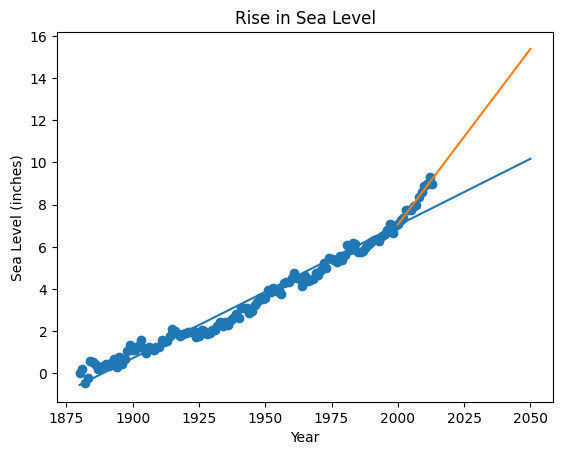

In [3]:
def draw_plot():
    x = df["Year"]
    y = df["CSIRO Adjusted Sea Level"]

    # Create scatter plot
    plt.scatter(x, y)

    # Create first line of best fit
    # Adapted from https://stackoverflow.com/questions/61205263/how-can-i-extend-a-linear-regression-line-and-predict-the-future
    extended_x_1 = [*range(df.iloc[0, 0], 2051, 1)]

    res = linregress(x, y)

    line = [res.slope * x + res.intercept for x in extended_x_1]

    plt.plot(extended_x_1, line)

    # Create second line of best fit
    x_2000_2050 = df.loc[df["Year"] >= 2000, "Year"]
    y_2000_2050 = df.loc[df["Year"] >= 2000, "CSIRO Adjusted Sea Level"]

    extended_x_2 = [*range(2000, 2051, 1)]

    res_2000_2050 = linregress(x_2000_2050, y_2000_2050)

    line_2000_2050 = [
        res_2000_2050.slope * x + res_2000_2050.intercept for x in extended_x_2
    ]

    plt.plot(extended_x_2, line_2000_2050)

    # Add labels and title
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    plt.title("Rise in Sea Level")

    # plt.savefig("sea_level_plot.png")
    return plt.gca()


plt.show(draw_plot())